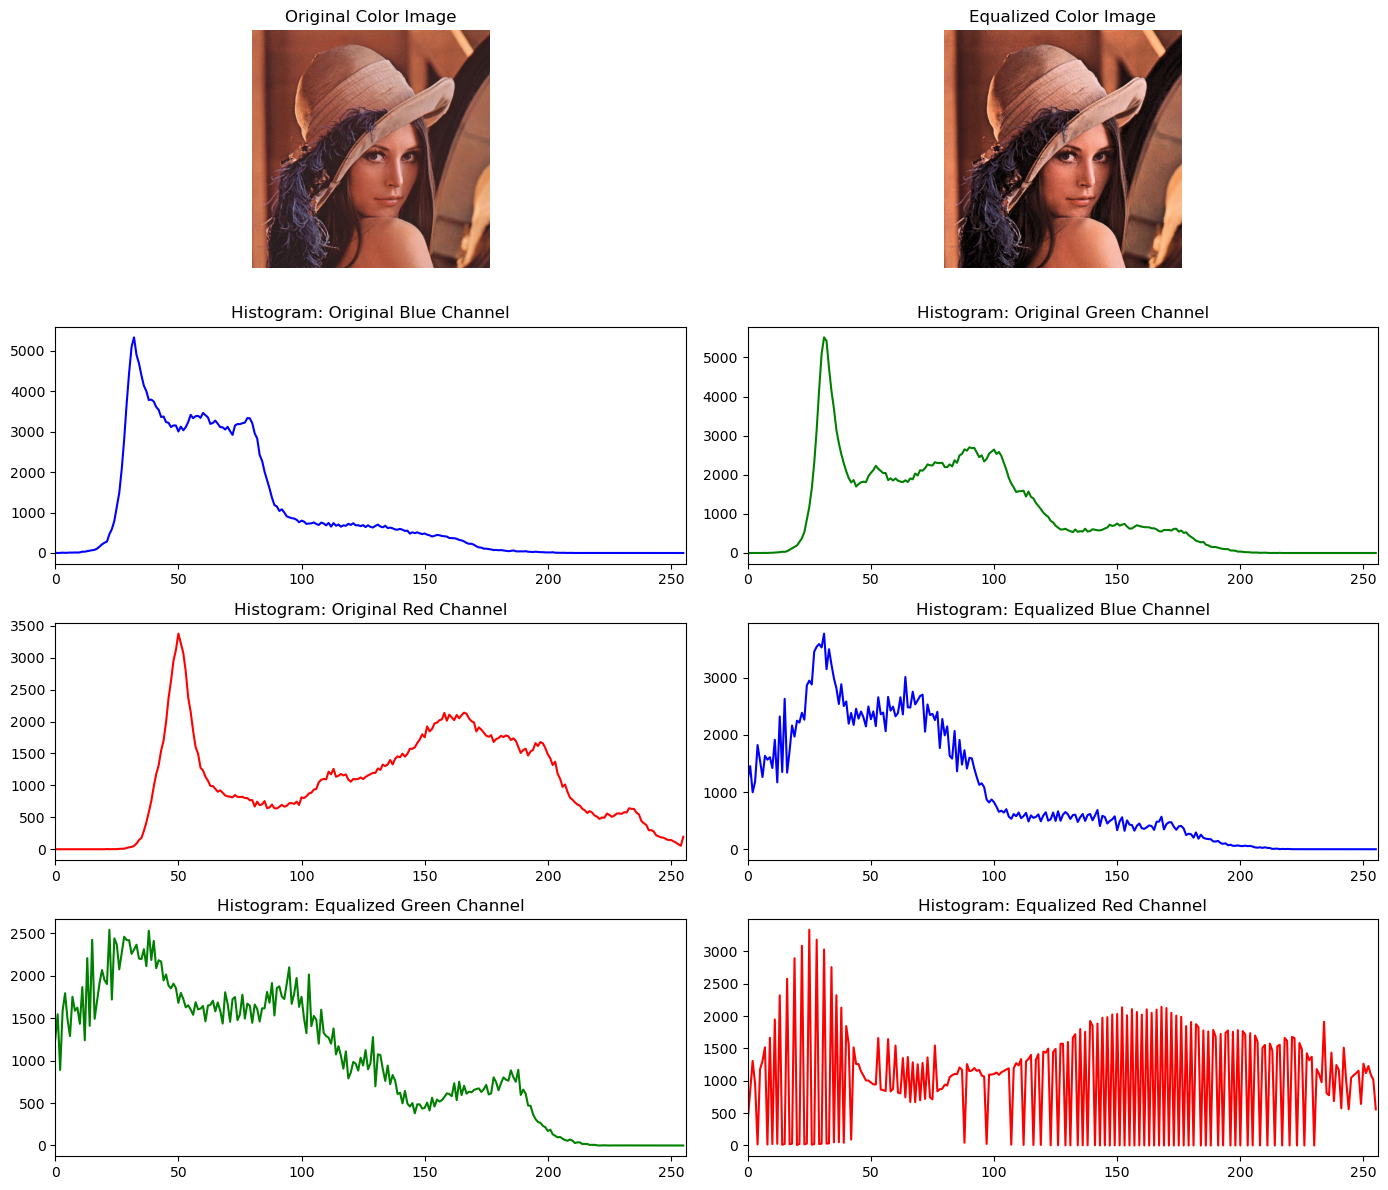

In [8]:
# =============================================================================
# Theoretical Explanation of Histogram Equalization
# =============================================================================
#
# **Histogram Equalization** is a technique used in image processing to improve 
# the contrast of an image by adjusting the intensity distribution of its pixels.
#
# This technique is widely used in both grayscale and color image processing.
# In this program, we apply histogram equalization to both grayscale and color 
# images separately. Below is a detailed explanation of the steps involved.
#
# **Steps Involved:**
# 1. **Image Loading**: 
#    - The program starts by loading two types of images:
#      - A **grayscale image** where the pixel values represent varying intensities 
#        from black (0) to white (255).
#      - A **color image** (typically in BGR format) where each pixel is made up 
#        of three channels: Red, Green, and Blue (RGB).
#
# 2. **Histogram Calculation**: 
#    - The program calculates the histogram of an image. A histogram is a plot 
#      of the frequency distribution of pixel intensities. For grayscale images, 
#      we calculate the distribution of single intensity values, while for color 
#      images, we calculate the histogram for each of the three color channels 
#      (Red, Green, Blue) separately.
#
# 3. **Cumulative Distribution Function (CDF)**:
#    - After obtaining the histogram, we compute the **Cumulative Distribution Function (CDF)**.
#      - The CDF is the cumulative sum of the histogram values. It represents the 
#        cumulative probability distribution of pixel intensities.
#      - It helps in determining how many pixels have intensities less than or equal 
#        to a specific intensity.
#      
# 4. **Normalization of CDF**:
#    - The CDF is normalized to the range [0, 1] by dividing it by the maximum CDF value.
#    - The normalized CDF is then scaled to the range [0, 255], which is the intensity range 
#      typically used in images. This gives us the **equalized CDF**.
#
# 5. **Image Equalization**:
#    - The equalized CDF values are then used to map the original pixel intensities to new 
#      values in the image, enhancing the contrast.
#    - For grayscale images, this mapping is applied directly to the intensity values.
#    - For color images, the same process is applied to each of the Red, Green, and Blue 
#      channels independently. This results in a color image with improved contrast across 
#      all channels.
#
# 6. **Display of Results**:
#    - After processing, both the original and equalized images (grayscale and color) 
#      are displayed using matplotlib. The images are shown side by side for comparison 
#      of the contrast before and after equalization.
#
# **Why Equalization Improves Contrast:**
# - The key idea behind histogram equalization is to redistribute the pixel intensities 
#   such that they span the entire available range. This allows dark and bright regions 
#   of the image to have more distinct and visible intensity differences, thus improving 
#   the image contrast.
#
# **Grayscale vs Color Image Equalization**:
# - In grayscale equalization, only the intensity values of the pixels are modified.
# - In color image equalization, each color channel (R, G, B) is processed independently, 
#   and the contrast is enhanced for each channel. This ensures that the overall color balance 
#   of the image is maintained while still enhancing the contrast.
#
# The program applies these steps to both grayscale and color images and visualizes the results 
# in a single plot for easy comparison.
#
# =============================================================================

%matplotlib inline

import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Define the image path (Replace with your own image path)
image_path = os.path.join(os.getcwd(), 'data', 'images', 'lena_color.jpg')  # Modify this with your image path
#image_path = os.path.join(os.getcwd(), 'data', 'images', '.png')  # Modify this with your image path


# Load the image in color
image = cv2.imread(image_path)

# Check if the image was loaded properly
if image is None:
    raise FileNotFoundError(f"Image not found at {image_path}")

# Convert the image to the HSV color space
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Extract the Value (intensity) channel
h, s, v = cv2.split(hsv_image)

# Apply histogram equalization to the Value channel
equalized_v = cv2.equalizeHist(v)

# Merge the equalized Value channel back with Hue and Saturation channels
equalized_hsv = cv2.merge([h, s, equalized_v])

# Convert the equalized HSV image back to BGR color space
equalized_image = cv2.cvtColor(equalized_hsv, cv2.COLOR_HSV2BGR)

# Calculate histograms for the original and equalized images
hist_original = [cv2.calcHist([image[:, :, i]], [0], None, [256], [0, 256]) for i in range(3)]
hist_equalized = [cv2.calcHist([equalized_image[:, :, i]], [0], None, [256], [0, 256]) for i in range(3)]

# Plot the original and equalized images along with their histograms
plt.figure(figsize=(14, 12))

# Row 1: Original and Equalized Images
plt.subplot(4, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Color Image")
plt.axis('off')

plt.subplot(4, 2, 2)
plt.imshow(cv2.cvtColor(equalized_image, cv2.COLOR_BGR2RGB))
plt.title("Equalized Color Image")
plt.axis('off')

# Row 2: Histograms of Original Image Channels
plt.subplot(4, 2, 3)
plt.plot(hist_original[0], color='blue')
plt.title("Histogram: Original Blue Channel")
plt.xlim(0, 256)

plt.subplot(4, 2, 4)
plt.plot(hist_original[1], color='green')
plt.title("Histogram: Original Green Channel")
plt.xlim(0, 256)

# Row 3: Histograms of Original Image Channels (contd.)
plt.subplot(4, 2, 5)
plt.plot(hist_original[2], color='red')
plt.title("Histogram: Original Red Channel")
plt.xlim(0, 256)

plt.subplot(4, 2, 6)
plt.plot(hist_equalized[0], color='blue')
plt.title("Histogram: Equalized Blue Channel")
plt.xlim(0, 256)

# Row 4: Histograms of Equalized Image Channels
plt.subplot(4, 2, 7)
plt.plot(hist_equalized[1], color='green')
plt.title("Histogram: Equalized Green Channel")
plt.xlim(0, 256)

plt.subplot(4, 2, 8)
plt.plot(hist_equalized[2], color='red')
plt.title("Histogram: Equalized Red Channel")
plt.xlim(0, 256)

# Show the plots
plt.tight_layout()
plt.show()